In [18]:
%pip install pandas numpy matplotlib seaborn scikit-learn scipy requests

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
# import requests

# Load dataset
# url = 'https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci'
# df = pd.read_csv(url)

# df = requests.get(url)



# read local file from data folder
# columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'ca', 'thal', 'target']
df = pd.read_csv('data/heart_cleveland_upload.csv')



# Display basic information
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [7]:
# Step 3: Handle Missing Values
# Checking for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# Handle missing values (drop or fill)
# For example, filling missing values with the median of the column
df.fillna(df.median(), inplace=True)


Missing values in each column:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


In [ ]:
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# # Step 4: Encode Categorical Variables
# # List of categorical columns (example, adjust based on your dataset)
# categorical_cols = df.select_dtypes(include=['object']).columns

# # Apply Label Encoding for categorical variables
# label_encoder = LabelEncoder()
# for col in categorical_cols:
#     df[col] = label_encoder.fit_transform(df[col])

# Convert categorical variables into dummy variables
data = pd.get_dummies(df, drop_first=True)

# Display the modified dataset
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [13]:
# print("\nColumns in the dataset:")
# print(df.columns)
from sklearn.preprocessing import StandardScaler

# Define the features (X) and target (y)
X = df.drop('condition', axis=1)
y = df['condition']

# Apply Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the scaled data
X_scaled[:5]


array([[ 1.60030243,  0.69109474, -2.24062879,  1.59626645, -0.25717927,
         2.43042728,  1.01019851, -0.81209457, -0.69641941, -0.82081263,
         0.6437811 ,  0.34482438, -0.87429153],
       [ 1.60030243, -1.44697961, -2.24062879,  0.46841791, -0.16085866,
        -0.41145029, -1.00341866,  0.06115701, -0.69641941,  0.63947031,
        -0.97658319,  1.41162482, -0.87429153],
       [ 1.26824154, -1.44697961, -2.24062879,  1.03234218, -0.41129224,
        -0.41145029, -1.00341866, -1.55435841, -0.69641941,  1.32666228,
         2.26414539, -0.72197605, -0.87429153],
       [ 1.15755458,  0.69109474, -2.24062879,  0.35563305,  0.66749858,
         2.43042728,  1.01019851,  1.06539633, -0.69641941,  0.29587432,
         0.6437811 ,  0.34482438, -0.87429153],
       [ 1.04686761,  0.69109474, -2.24062879, -1.22335491, -0.70025407,
        -0.41145029,  1.01019851, -0.24448104,  1.43591632,  0.63947031,
         0.6437811 , -0.72197605, -0.87429153]])

In [15]:
# Check the unique values in 'condition' column to ensure it's binary
# data['condition'].unique()
# Check the unique values of the target variable
y.unique()


array([0, 1])

In [16]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shape of the resulting datasets
X_train.shape, X_test.shape


((237, 13), (60, 13))

In [17]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict the target values for the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 0.7333333333333333
Confusion Matrix:
[[23  9]
 [ 7 21]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



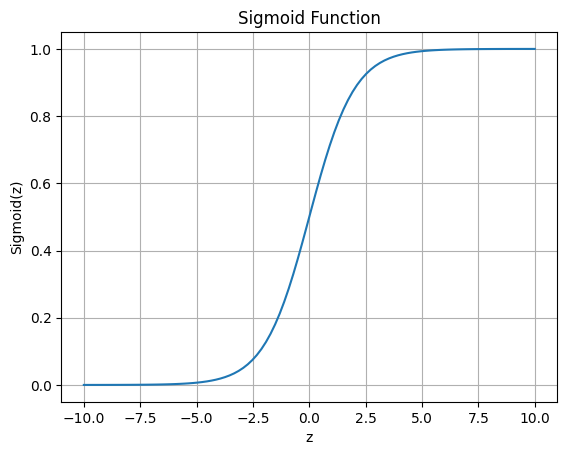

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Plot the sigmoid function
z = np.linspace(-10, 10, 100)
plt.plot(z, sigmoid(z))
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.grid(True)
plt.show()


In [20]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Set up GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'C': 0.1}
Best Cross-Validation Score: 0.8687943262411348


In [21]:
# Use the best found parameters to train the final model
best_model = grid_search.best_estimator_

# Train the model on the training data
best_model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [22]:
# Train a logistic regression model without tuning (using default C=1.0)
default_model = LogisticRegression(max_iter=1000)
default_model.fit(X_train, y_train)

# Make predictions with the default model
y_pred_default = default_model.predict(X_test)

# Evaluate the default model
accuracy_default = accuracy_score(y_test, y_pred_default)
conf_matrix_default = confusion_matrix(y_test, y_pred_default)
class_report_default = classification_report(y_test, y_pred_default)

print(f"Default Model Accuracy: {accuracy_default}")
print(f"Default Model Confusion Matrix:\n{conf_matrix_default}")
print(f"Default Model Classification Report:\n{class_report_default}")


Default Model Accuracy: 0.7333333333333333
Default Model Confusion Matrix:
[[23  9]
 [ 7 21]]
Default Model Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



In [23]:
# Make predictions with the tuned model
y_pred_tuned = best_model.predict(X_test)

# Evaluate the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
class_report_tuned = classification_report(y_test, y_pred_tuned)

print(f"Tuned Model Accuracy: {accuracy_tuned}")
print(f"Tuned Model Confusion Matrix:\n{conf_matrix_tuned}")
print(f"Tuned Model Classification Report:\n{class_report_tuned}")


Tuned Model Accuracy: 0.7333333333333333
Tuned Model Confusion Matrix:
[[22 10]
 [ 6 22]]
Tuned Model Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.69      0.73        32
           1       0.69      0.79      0.73        28

    accuracy                           0.73        60
   macro avg       0.74      0.74      0.73        60
weighted avg       0.74      0.73      0.73        60

